In [1]:
'''Importing libaries needed'''
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''Reading the dataset and looking at the details of the data'''
df = pd.read_csv('players_fifa22.csv') #Read the dataset and assign it to an instant
df.shape #Show how many rows and columns in the dataset
df.info() #Show all the infomation about the dataset such as the datatype for each column in dataset
df.nunique() #Add up and show the total number of unique values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

ID           19156
Name         18058
FullName     19042
Age             29
Height          50
             ...  
RWBRating       72
LBRating        73
CBRating        72
RBRating        73
GKRating        66
Length: 90, dtype: int64

<AxesSubplot:>

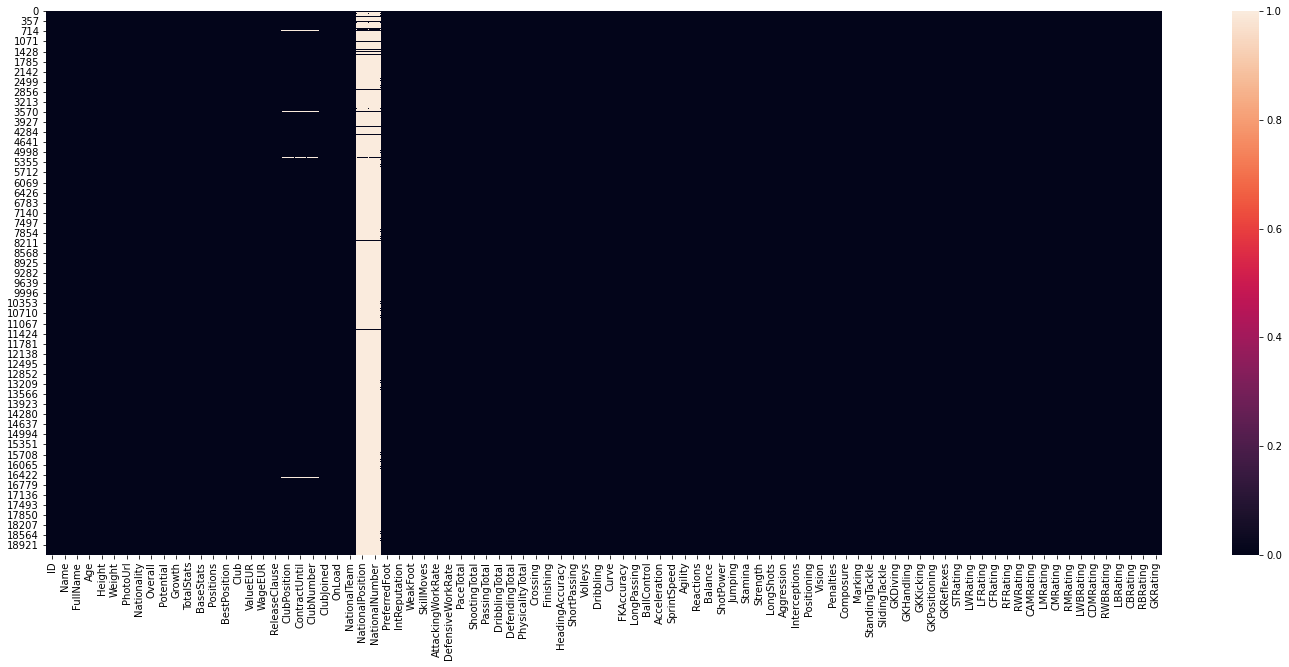

In [4]:
'''Using data visualisation to find the null columns'''
plt.figure(figsize=(25,10)) #setting the figure size to fit all the columns accurately
sns.heatmap(df.isnull()) #seaborn heatmap

In [5]:
'''Dropping the the columns that contain a lot of null values shown in the figure'''
df.drop(['NationalTeam','NationalPosition','NationalNumber'],axis=1,inplace=True)
df.shape #make sure the columns were dropped. 90 to 87 columns now

(19260, 87)

<AxesSubplot:>

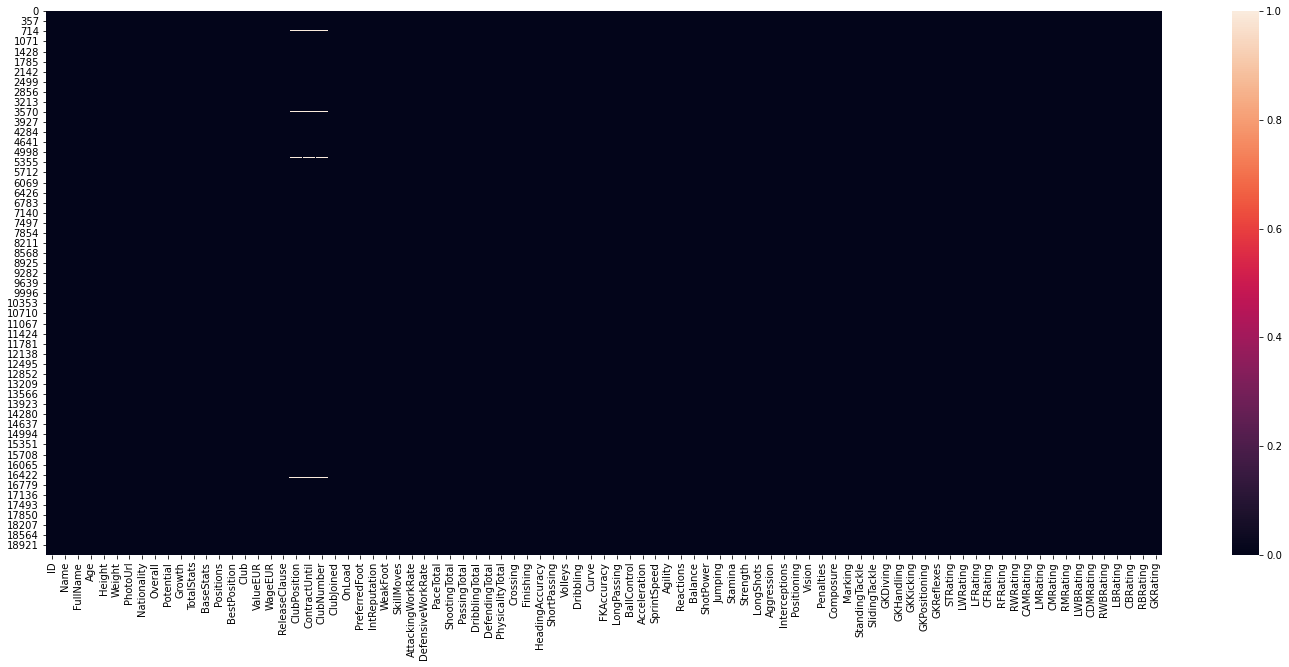

In [6]:
'''Using data visualisation to double check the null values of dataset'''
plt.figure(figsize=(25,10)) #set figure size
sns.heatmap(df.isnull()) #seaborn heatpmap function to visually display null columns

In [7]:
'''Looking into the dataset itself, I can drop columns unnecessary to use for model'''
df.drop(['ID','Name','FullName','PhotoUrl','Nationality','Overall',
        'Potential','Growth','Growth','TotalStats','BaseStats','Nationality','Positions',
        'Club','ValueEUR','WageEUR','ReleaseClause','ClubPosition','ContractUntil','ClubNumber',
        'ClubJoined','OnLoad','IntReputation','WeakFoot','SkillMoves','PaceTotal','ShootingTotal',
        'PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal',
        'STRating','LWRating','LFRating','CFRating','RFRating','RWRating','CAMRating',
        'LMRating','CMRating','RMRating','LWBRating','CDMRating','RWRating','RWBRating',
        'LBRating','CBRating','RBRating','GKRating',],axis=1,inplace=True) #Drop irrelevant columns

Age                  0
Height               0
Weight               0
BestPosition         0
PreferredFoot        0
AttackingWorkRate    0
DefensiveWorkRate    0
Crossing             0
Finishing            0
HeadingAccuracy      0
ShortPassing         0
Volleys              0
Dribbling            0
Curve                0
FKAccuracy           0
LongPassing          0
BallControl          0
Acceleration         0
SprintSpeed          0
Agility              0
Reactions            0
Balance              0
ShotPower            0
Jumping              0
Stamina              0
Strength             0
LongShots            0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
StandingTackle       0
SlidingTackle        0
GKDiving             0
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
dtype: int64

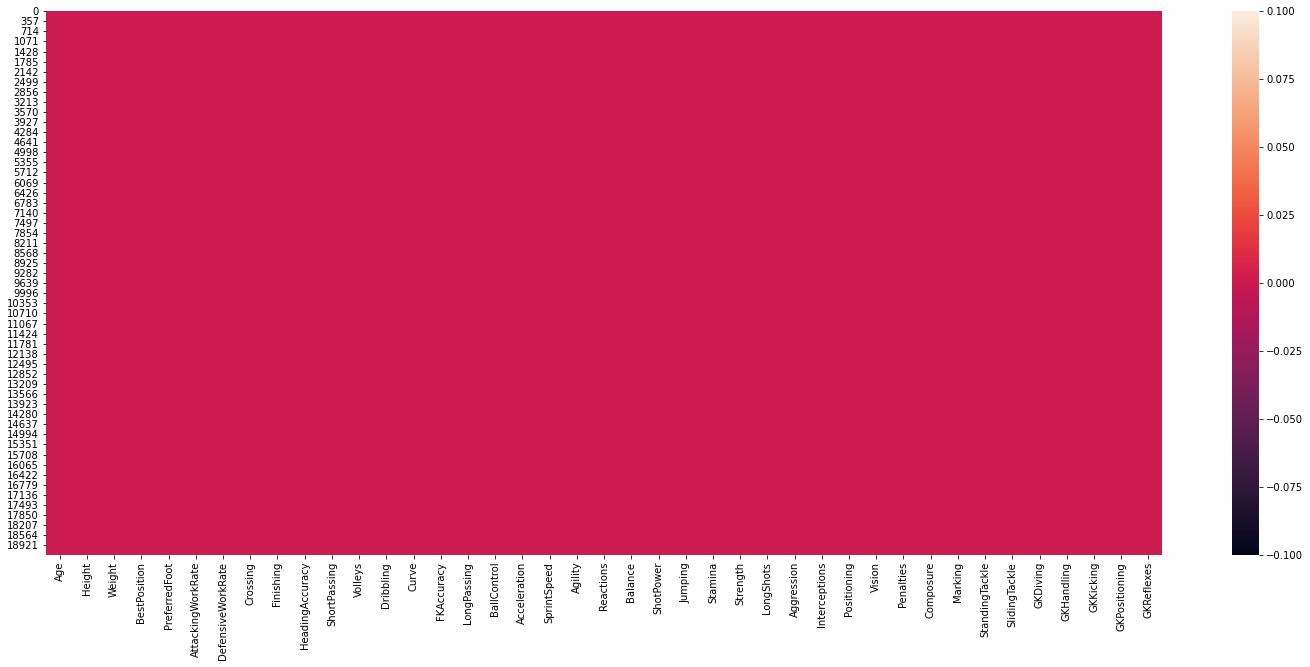

In [8]:
'''Double check for anymore null values using data visualisation, figure is now clean'''
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())
df.isnull().sum() #Add up and show the total number of null values in dataset

In [9]:
'''Dropping any duplicated values in dataset'''
df.duplicated().sum() #Add up and show the total number of duplicated values in dataset
df.drop_duplicates(keep='first',inplace=True) #Keep first occurence of duplicate
df.shape #Comparing to above shape, 104 duplicate values were dropped

(19156, 41)

In [10]:
'''Finding number of categorical data needed to handle'''
print('Number of Categorical Columns: ', len(df.select_dtypes(include=object).columns)) #select what datatype each column is
print('Number of Numerical Columns: ', len(df.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  4
Number of Numerical Columns:  37


In [11]:
'''Handling categorical data so they converted to integer to be used for model'''
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first') 
dfn = df[['PreferredFoot','AttackingWorkRate','DefensiveWorkRate']] #selecting specific columns for new dataframe
dfn = encoder.fit_transform(dfn).toarray() #fit and transform to array
dfn = pd.DataFrame(dfn,columns=['Foot','LowAttackRate','MedAttackRate','LowDefendRate','MedDefendRate']) #then convert that array into a dataframe with column names
df = pd.concat([df,dfn],axis=1) #Add newly created dataframe to original one
df.drop(['PreferredFoot','AttackingWorkRate','DefensiveWorkRate'],axis=1,inplace=True) #drop old columns replaced

In [12]:
'''Check the dataset after handling categorical data'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 0 to 19259
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              19156 non-null  float64
 1   Height           19156 non-null  float64
 2   Weight           19156 non-null  float64
 3   BestPosition     19156 non-null  object 
 4   Crossing         19156 non-null  float64
 5   Finishing        19156 non-null  float64
 6   HeadingAccuracy  19156 non-null  float64
 7   ShortPassing     19156 non-null  float64
 8   Volleys          19156 non-null  float64
 9   Dribbling        19156 non-null  float64
 10  Curve            19156 non-null  float64
 11  FKAccuracy       19156 non-null  float64
 12  LongPassing      19156 non-null  float64
 13  BallControl      19156 non-null  float64
 14  Acceleration     19156 non-null  float64
 15  SprintSpeed      19156 non-null  float64
 16  Agility          19156 non-null  float64
 17  Reactions   

In [13]:
'''Simplify all the positions into four categories'''
def position_category(pos):
    Forward=["ST","CF","LW","LF","RW","RF"]
    Midfield=["CAM","CM","CDM","LM","RM"]
    Defense=["CB","LB","RB","RWB","LWB"]
    Goalkeeper=["GK"]
    if pos in Forward:
        pos="F"
        return pos
    elif pos in Midfield:
        pos="M"
        return pos
    elif pos in Defense:
        pos="D"
        return pos
    elif pos in Goalkeeper:
        pos="GK"
        return pos
    else:
        return pos

In [14]:
'''Change the value of 'BestPosition' to a category defined above'''
df['BestPosition'] = df['BestPosition'].apply(position_category) #change values
df['BestPosition'].value_counts()#Show number of samples in each position category

M     7332
D     6473
F     3232
GK    2119
Name: BestPosition, dtype: int64

In [15]:
'''Check the effects of the position_category function defined above'''
df.head(10)
df.isnull().sum()

Age                104
Height             104
Weight             104
BestPosition       104
Crossing           104
Finishing          104
HeadingAccuracy    104
ShortPassing       104
Volleys            104
Dribbling          104
Curve              104
FKAccuracy         104
LongPassing        104
BallControl        104
Acceleration       104
SprintSpeed        104
Agility            104
Reactions          104
Balance            104
ShotPower          104
Jumping            104
Stamina            104
Strength           104
LongShots          104
Aggression         104
Interceptions      104
Positioning        104
Vision             104
Penalties          104
Composure          104
Marking            104
StandingTackle     104
SlidingTackle      104
GKDiving           104
GKHandling         104
GKKicking          104
GKPositioning      104
GKReflexes         104
Foot               104
LowAttackRate      104
MedAttackRate      104
LowDefendRate      104
MedDefendRate      104
dtype: int6

In [16]:
'''Drop the rows with missing values'''
df.dropna(inplace=True) #drop all the rows with missing value
df.reset_index(drop=True,inplace=True) #resets the index so it reflects with number of rows since we dropped some

In [17]:
'''References:
Fifa 19 - Classification & Regression. Kaggle.com. (2018). Retrieved 17 November 2021, from https://www.kaggle.com/ap1495/fifa-19-classification-regression/notebook.
'''

'References:\nFifa 19 - Classification & Regression. Kaggle.com. (2018). Retrieved 17 November 2021, from https://www.kaggle.com/ap1495/fifa-19-classification-regression/notebook.\n'

In [18]:
'''After Data pre-processed, can analyse dataset with data visualisation'''
'''Creates a Pie Chart showing the data distribution of samples in each category (Player Position)'''
PositionTrace = go.Pie(values=df['BestPosition'].value_counts().values,labels=df['BestPosition'].value_counts().index.values,hole=0.4)

layout = go.Layout(title='Distribution of Player Position')

fig = go.Figure(data=[PositionTrace], layout=layout)
py.iplot(fig)

In [19]:
'''Data Visualistaion'''
'''Creates a Scatter Polar graph to show which features correlate with each category (Player Position)'''
df_attributes = df.groupby(by='BestPosition')['Finishing','LongPassing','Dribbling',
                                          'StandingTackle','Interceptions','Penalties'].mean().reset_index()

ForwardTrace = go.Scatterpolar(theta=['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties'],
                          r=df_attributes[df_attributes['BestPosition'] == 'F'][['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties']].values[0],
                          fill='toself',name='Forward')
MidfielderTrace = go.Scatterpolar(theta=['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties'],
                          r=df_attributes[df_attributes['BestPosition'] == 'M'][['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties']].values[0],
                          fill='toself',name='Midfielder')
DefenderTrace = go.Scatterpolar(theta=['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties'],
                          r=df_attributes[df_attributes['BestPosition'] == 'D'][['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties']].values[0],
                          fill='toself',name='Defender')
GoalkeeperTrace = go.Scatterpolar(theta=['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties'],
                          r=df_attributes[df_attributes['BestPosition'] == 'GK'][['Finishing','LongPassing','Dribbling','StandingTackle','Interceptions','Penalties']].values[0],
                          fill='toself',name='Goalkeeper')

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,range=[0, 100])),showlegend=True,title='Attributes by Position')

fig = go.Figure(data=[ForwardTrace, MidfielderTrace, DefenderTrace, GoalkeeperTrace], layout=layout)
py.iplot(fig)

In [20]:
'''Transforming categorical feature into numeric.'''
def numerical_position(pos):
    if pos == 'GK':
        return 0
    elif pos == 'D':
        return 1
    elif pos == 'M':
        return 2
    else:
        return 3
    
df['BestPosition'] = df['BestPosition'].apply(numerical_position)

<AxesSubplot:>

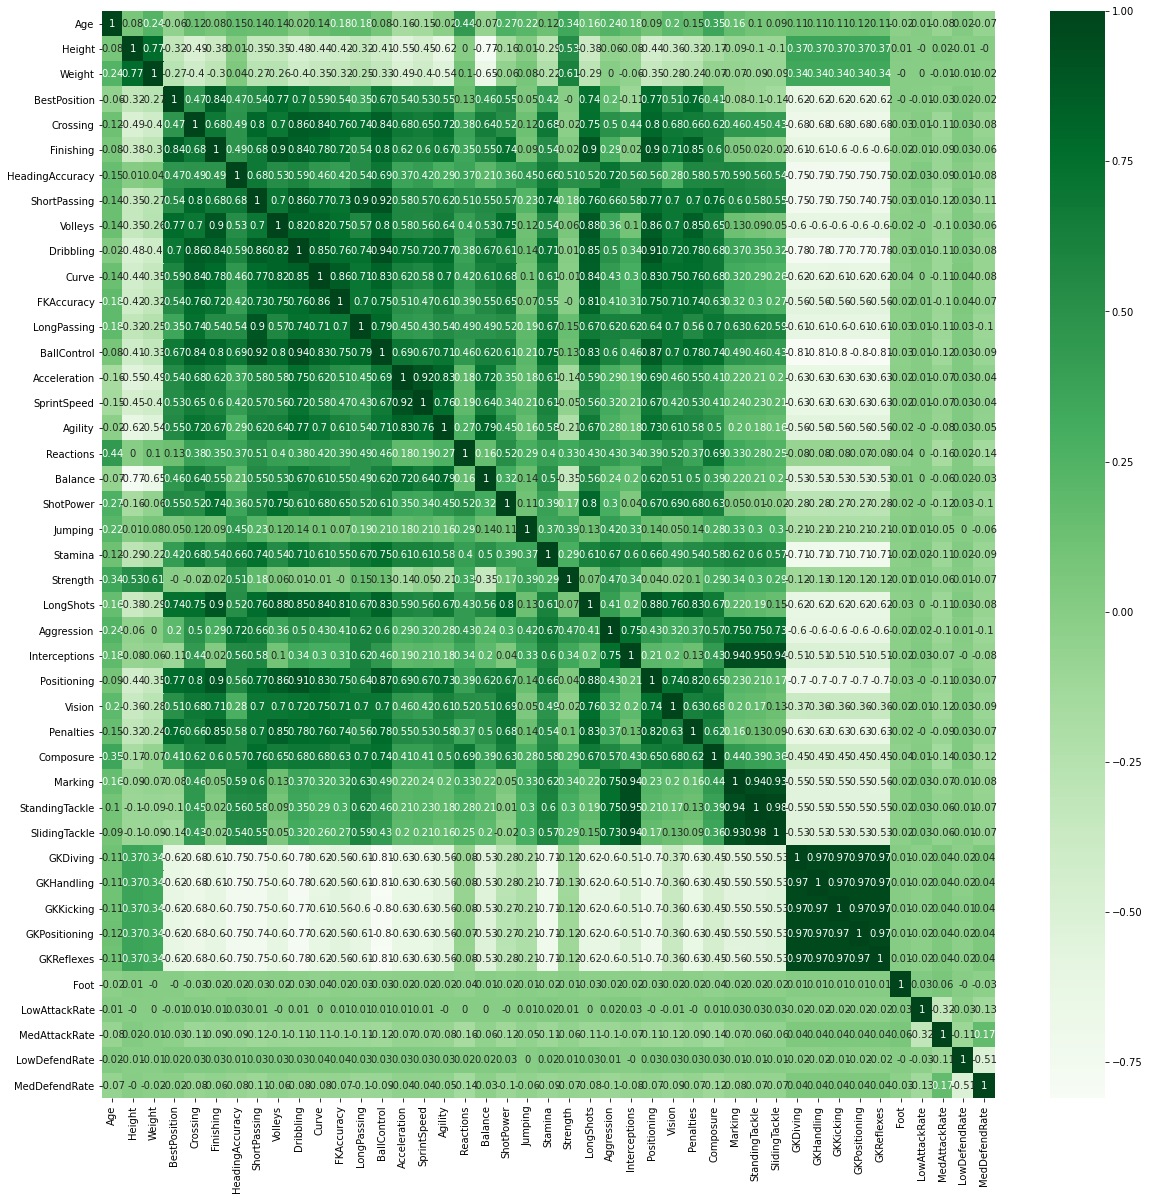

In [21]:
'''Using Data Visualisation to display a correlation matrix to see which feature correlates to 'BestPosition' most'''
plt.figure(figsize=(20,20))
correlation_matrix=df.corr().round(2) #create a correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens')

In [22]:
'''Can also use this function to see the correlation. More clear here when there's lots of features'''
df.corr().abs()['BestPosition'].sort_values(ascending=False) #sort from most correlated to least

BestPosition       1.000000
Finishing          0.839779
Volleys            0.773856
Positioning        0.771551
Penalties          0.760599
LongShots          0.741697
Dribbling          0.704871
BallControl        0.671980
GKDiving           0.622389
GKHandling         0.620345
GKReflexes         0.620005
GKPositioning      0.617978
GKKicking          0.617492
Curve              0.593774
ShotPower          0.553677
Agility            0.547983
Acceleration       0.540155
FKAccuracy         0.536913
ShortPassing       0.535410
SprintSpeed        0.525421
Vision             0.513495
Crossing           0.472730
HeadingAccuracy    0.467373
Balance            0.464056
Stamina            0.416260
Composure          0.409988
LongPassing        0.353713
Height             0.321949
Weight             0.273827
Aggression         0.198840
SlidingTackle      0.139162
Reactions          0.125055
Interceptions      0.112144
StandingTackle     0.101024
Marking            0.077212
Age                0

In [23]:
'''Dropping columns with low correlation with the target (Best Position)'''
df.drop(columns=['Age','Foot','LowAttackRate','MedAttackRate','LowDefendRate','MedDefendRate','Marking','Jumping','Strength'],inplace=True)

In [24]:
'''Separating features and target("BestPosition")'''
X=df.drop("BestPosition",axis=1) #selecting all columns apart from target
y=df["BestPosition"]

In [25]:
'''Splitting the dataset to Train and Test'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [26]:
'''To know the shape of the train and test dataset.'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13336, 33)
(13336,)
(5716, 33)
(5716,)


In [27]:
'''Defining a function to fit the training and testing set into the model'''
def fitAndTest(X_train,X_test,y_train,y_test,model):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("Training Score: {:.3f}".format(train_score))
    print("Testing Score: {:.3f}".format(test_score))

In [28]:
'''Defining a function to create a classification report for the models'''
target_names=["Goalkeeper","Defender","Midfielder","Forward"] #replace the numbers from the categorical data handling
def classificationReport(model,X_test):
    y_test_pred = model.predict(X_test)
    cReport = classification_report(y_test, y_test_pred,target_names=target_names) #create classification report
    print(cReport)

In [29]:
'''Defining a function to calculate the average model's performance using cross validation technique and output scores'''
def cv_score(model):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') #using 5 k-fold
    ave = scores.mean() #average mean
    print("Average CV model accuracy:{:.3f}".format(ave))
    return scores

In [30]:
'''K-Nearest Neighbour Algorithm default model'''
modelKNN = KNeighborsClassifier(n_neighbors=5) #using a random number for n neighbour at the moment
fitAndTest(X_train,X_test,y_train,y_test,modelKNN) #Testing score here is model accuracy at the moment

Training Score: 0.932
Testing Score: 0.902


In [31]:
'''Neural Networks Algorithm default model'''
modelMLP=MLPClassifier(random_state=0) #random_state=0 so weights are same
fitAndTest(X_train,X_test,y_train,y_test,modelMLP)

Training Score: 0.914
Testing Score: 0.913


In [32]:
'''Printing the classification report to see accuracy scores'''
classificationReport(modelKNN,X_test)
print()
classificationReport(modelMLP,X_test)

              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.93      0.91      0.92      1921
  Midfielder       0.85      0.90      0.88      2166
     Forward       0.91      0.82      0.86       973

    accuracy                           0.90      5716
   macro avg       0.92      0.91      0.91      5716
weighted avg       0.90      0.90      0.90      5716


              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.96      0.93      0.94      1921
  Midfielder       0.91      0.86      0.88      2166
     Forward       0.80      0.94      0.86       973

    accuracy                           0.91      5716
   macro avg       0.92      0.93      0.92      5716
weighted avg       0.92      0.91      0.91      5716



In [33]:
'''Displaying cross validation average score of model accuracy'''
print(cv_score(modelKNN))
print(cv_score(modelMLP))

Average CV model accuracy:0.884
[0.83836263 0.87955917 0.88661417 0.90577428 0.91049869]
Average CV model accuracy:0.896
[0.85568092 0.91104697 0.87795276 0.91207349 0.92493438]


In [34]:
'''Scaling the Data'''
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train) 
X_test_scaled = sc.transform(X_test)

In [35]:
'''Seeing if scaling the data helps improve the model accuracy'''
print("KNN Model")
fitAndTest(X_train_scaled,X_test_scaled,y_train,y_test,modelKNN)
print("")
print("Neural Networks Model")
fitAndTest(X_train_scaled,X_test_scaled,y_train,y_test,modelMLP)

KNN Model
Training Score: 0.930
Testing Score: 0.891

Neural Networks Model
Training Score: 0.973
Testing Score: 0.920


In [36]:
'''Printing the classification report to see an improve in model accuracy scores'''
classificationReport(modelKNN,X_test_scaled)
print("")
classificationReport(modelMLP,X_test_scaled)

              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.92      0.89      0.91      1921
  Midfielder       0.83      0.90      0.86      2166
     Forward       0.91      0.80      0.85       973

    accuracy                           0.89      5716
   macro avg       0.92      0.90      0.91      5716
weighted avg       0.89      0.89      0.89      5716


              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.95      0.93      0.94      1921
  Midfielder       0.88      0.92      0.90      2166
     Forward       0.89      0.85      0.87       973

    accuracy                           0.92      5716
   macro avg       0.93      0.92      0.93      5716
weighted avg       0.92      0.92      0.92      5716



In [37]:
print(cv_score(modelKNN))
print(cv_score(modelMLP))

Average CV model accuracy:0.884
[0.83836263 0.87955917 0.88661417 0.90577428 0.91049869]
Average CV model accuracy:0.896
[0.85568092 0.91104697 0.87795276 0.91207349 0.92493438]


In [38]:
'''References:
scikit learn hyperparameter optimization for MLPClassifier. Medium. (2020). Retrieved 17 November 2021, from https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b.
sklearn.neural_network.MLPClassifier. scikit-learn. (2021). Retrieved 17 November 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.
'''

'References:\nscikit learn hyperparameter optimization for MLPClassifier. Medium. (2020). Retrieved 17 November 2021, from https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b.\nsklearn.neural_network.MLPClassifier. scikit-learn. (2021). Retrieved 17 November 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.\n'

In [39]:
'''Setting up the parameters to perform grid and random search'''
parameter_space = {
    'hidden_layer_sizes': (100,),
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

k_list = list(range(1,16))
weight_list = ['uniform','distance']
para_dict = dict(n_neighbors=k_list, weights=weight_list)

In [40]:
'''Defining Functions to apply the Grid and Random Search'''
def gridSearch(model, parameters, modelName):
    start_time = time.time() #start time
    grid = GridSearchCV(model, parameters, n_jobs=-1, cv=5, scoring="accuracy",return_train_score=False)
    grid.fit(X,y)
    print("Grid Search: " + modelName)
    print("{} time to run".format(round(time.time() - start_time, 3))) #measure time
    return grid 
    
def randomSearch(model, parameters, modelName):
    start_time = time.time()
    rand = RandomizedSearchCV(model,parameters,cv=5,scoring="accuracy",return_train_score=False,n_iter=5,random_state=5)
    rand.fit(X,y)
    print("Random Search: " + modelName)
    print("{} seconds to run".format(round(time.time() - start_time, 3)))
    return rand

In [41]:
'''Using Grid Search and Random Search to find best hyperparameters for model'''
gSearchKNN = gridSearch(modelKNN,para_dict,'KNN model')
rSearchKNN = randomSearch(modelKNN,para_dict,'KNN model')

gSearchMLP = gridSearch(modelMLP,parameter_space,'Neural Networks model')
rSearchMLP = randomSearch(modelMLP,parameter_space,'Neural Networks model')

Grid Search: KNN model
219.985 time to run
Random Search: KNN model
50.139 seconds to run
Grid Search: Neural Networks model
620.367 time to run
Random Search: Neural Networks model
393.668 seconds to run


In [42]:
'''Defining a function to use the results of grid and random search to get the best hyperparameters based on the avaerage model accuracy score'''
def GSRS_results(result):
    pd.DataFrame(result.cv_results_)[["mean_test_score","params"]] #gets and displays the mean_test_score and the params as a dataframe from the results of grid/random search
    print('Best parameters found:', result.best_params_)
    print("The best model's accuracy: {:.3f}".format(result.best_score_))
    print("Used values",result.best_params_)
    print("")

In [43]:
'''Printing the results of the best hyperparameters for the models and the model accuracy'''
print("Grid Search: KNN Model")
GSRS_results(gSearchKNN)
print("Random Search: KNN Model")
GSRS_results(rSearchKNN)
print("Grid Search: Neural Networks Model")
GSRS_results(gSearchMLP)
print("Random Search: Neural Networks Model")
GSRS_results(rSearchMLP)

Grid Search: KNN Model
Best parameters found: {'n_neighbors': 10, 'weights': 'uniform'}
The best model's accuracy: 0.890
Used values {'n_neighbors': 10, 'weights': 'uniform'}

Random Search: KNN Model
Best parameters found: {'weights': 'uniform', 'n_neighbors': 10}
The best model's accuracy: 0.890
Used values {'weights': 'uniform', 'n_neighbors': 10}

Grid Search: Neural Networks Model
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}
The best model's accuracy: 0.924
Used values {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}

Random Search: Neural Networks Model
Best parameters found: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activation': 'relu'}
The best model's accuracy: 0.924
Used values {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activa

In [44]:
'''Applying the best hyperparameters to the model and check for model accuracy improvement'''
modelKNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')
print("KNN model")
fitAndTest(X_train,X_test,y_train,y_test,modelKNN)
print()
modelMLP = MLPClassifier(random_state=0,solver='sgd',learning_rate='adaptive',hidden_layer_sizes=100,alpha=0.0001,activation='relu')
print("Neural Networks model")
fitAndTest(X_train_scaled,X_test_scaled,y_train,y_test,modelMLP)

KNN model
Training Score: 0.922
Testing Score: 0.906

Neural Networks model
Training Score: 0.929
Testing Score: 0.925


In [45]:
'''Printing the classification report to see an improve in model accuracy scores'''
classificationReport(modelKNN,X_test)
print("")
classificationReport(modelMLP,X_test_scaled)

              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.93      0.92      0.93      1921
  Midfielder       0.85      0.92      0.88      2166
     Forward       0.94      0.78      0.86       973

    accuracy                           0.91      5716
   macro avg       0.93      0.91      0.92      5716
weighted avg       0.91      0.91      0.91      5716


              precision    recall  f1-score   support

  Goalkeeper       1.00      1.00      1.00       656
    Defender       0.94      0.95      0.95      1921
  Midfielder       0.89      0.91      0.90      2166
     Forward       0.91      0.86      0.88       973

    accuracy                           0.92      5716
   macro avg       0.94      0.93      0.93      5716
weighted avg       0.93      0.92      0.92      5716



In [46]:
'''Defining a function to create a confusion matrix for a given model and testing data by comparing y_test and y_pred'''
def confusionMatrix(model,X_test):
    y_test_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_test_pred)
    print(cfm)
    return cfm

In [47]:
'''Printing the confusion matrix'''
cfmKNN = confusionMatrix(modelKNN,X_test)
print()
cfmMLP = confusionMatrix(modelMLP,X_test_scaled)

[[ 656    0    0    0]
 [   0 1773  148    0]
 [   0  131 1988   47]
 [   0    3  207  763]]

[[ 656    0    0    0]
 [   0 1821  100    0]
 [   0  107 1975   84]
 [   0    3  135  835]]


In [48]:
'''References:
Confusion Matrix for Multi-Class Classification - Analytics Vidhya. Analytics Vidhya. (2021). Retrieved 17 November 2021, from https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/.
'''

'References:\nConfusion Matrix for Multi-Class Classification - Analytics Vidhya. Analytics Vidhya. (2021). Retrieved 17 November 2021, from https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/.\n'

In [49]:
'''Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.'''
cfm_df = pd.DataFrame(cfmKNN,
                    index = ['Goalkeeper','Defender','Midfielder','Forward'],
                    columns = ['Goalkeeper','Defender','Midfielder','Forward'])

In [50]:
'''Defining a function to use Data Visualisation to plot the confusion matrix'''
def cmHeatmap(cm,model):
    labels = []
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(4,4)
    sns.heatmap(cfm_df, annot=labels, cmap='Greens', fmt='')
    accuracy  = np.trace(cm) / float(np.sum(cm))
    precision = cm[1,1] / sum(cm[:,1])
    recall    = cm[1,1] / sum(cm[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(accuracy,precision,recall,f1_score)
    figsize = plt.rcParams.get('figure.figsize')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label' + stats_text)
    plt.title(model + "Player Position Confusion Matrix")
    plt.show()

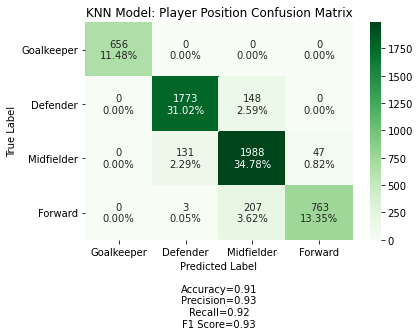

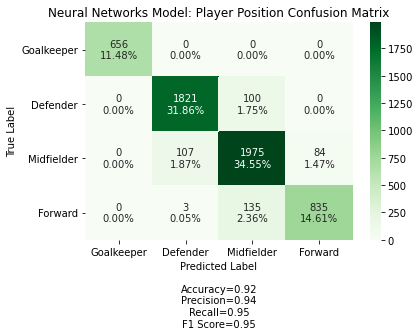

In [51]:
'''Display the confusion matrix plots'''
cmHeatmap(cfmKNN,'KNN Model: ')
cmHeatmap(cfmMLP,'Neural Networks Model: ')

In [52]:
'''Displaying cross validation average score of model accuracy'''
print(cv_score(modelKNN))
print(cv_score(modelMLP))

Average CV model accuracy:0.890
[0.85279454 0.89241669 0.89265092 0.91023622 0.90183727]
Average CV model accuracy:0.924
[0.92836526 0.9223301  0.91312336 0.92572178 0.93254593]
